In [10]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, invwishart, multinomial, dirichlet
import numpy as np
from numpy.linalg import inv
from sklearn.mixture import BayesianGaussianMixture

import warnings

warnings.filterwarnings("ignore")

In [243]:
X = multivariate_normal.rvs(mean=[3, 1], cov=[[1, -1.5], [-1.5, 2.89]], size=500)
X2 = multivariate_normal.rvs(mean=[-3, 1], cov=[[1, 1.5], [1.5, 2.89]], size=500)
X3 = multivariate_normal.rvs(mean=[0, -4], cov=[[9, 0], [0, 0.25]], size=500)
X = X + np.random.normal(0, 1, size=X.shape)
X2 = X2 + np.random.normal(0, 1, size=X2.shape)
X3 = X3 + np.random.normal(0, 1, size=X3.shape)
X = np.concatenate([X, X2, X3])

In [323]:
def plot_gaussian(u, cov, color, d=10, lw=2, levels=1):
    xs = np.linspace(u[0] - d, u[0] + d, 100)
    ys = np.linspace(u[1] - d, u[1] + d, 100)
    xs, ys = np.meshgrid(xs, ys)
    plt.contour(
        xs,
        ys,
        multivariate_normal.pdf(np.dstack([xs, ys]), mean=u, cov=cov),
        levels=levels,
        colors=color,
        linewidths=lw
    )
def plot_data(w):
    plt.figure(figsize=(10,10), dpi=300)
    plt.scatter(X[:, 0], X[:, 1], alpha=0.3, linewidth=0)
    plt.xlim(-w, w)
    plt.ylim(-w, w)

colors = ['red', 'green', 'blue']

In [250]:
N = 200

model = BayesianGaussianMixture(
    n_components=3,
    weight_concentration_prior=1e-2,
    init_params="random",
    covariance_type="full",
    max_iter=1,
    warm_start=True,
)

elbos = []
means = []
covs = []
weights = []
lrs = []
for i in range(N):
    model.fit(X)
    lpn, lr = model._estimate_log_prob_resp(X)
    lrs.append(lr)
    elbo = model._compute_lower_bound(lr, lpn)
    elbos.append(elbo)
    means.append(model.means_)
    covs.append(model.covariances_)
    weights.append(model.weights_)

elbos, means, covs, weights, lrs = (
    np.array(elbos),
    np.array(means),
    np.array(covs),
    np.array(weights),
    np.array(lrs),
)

Text(0.5, 0, 'Iteration')

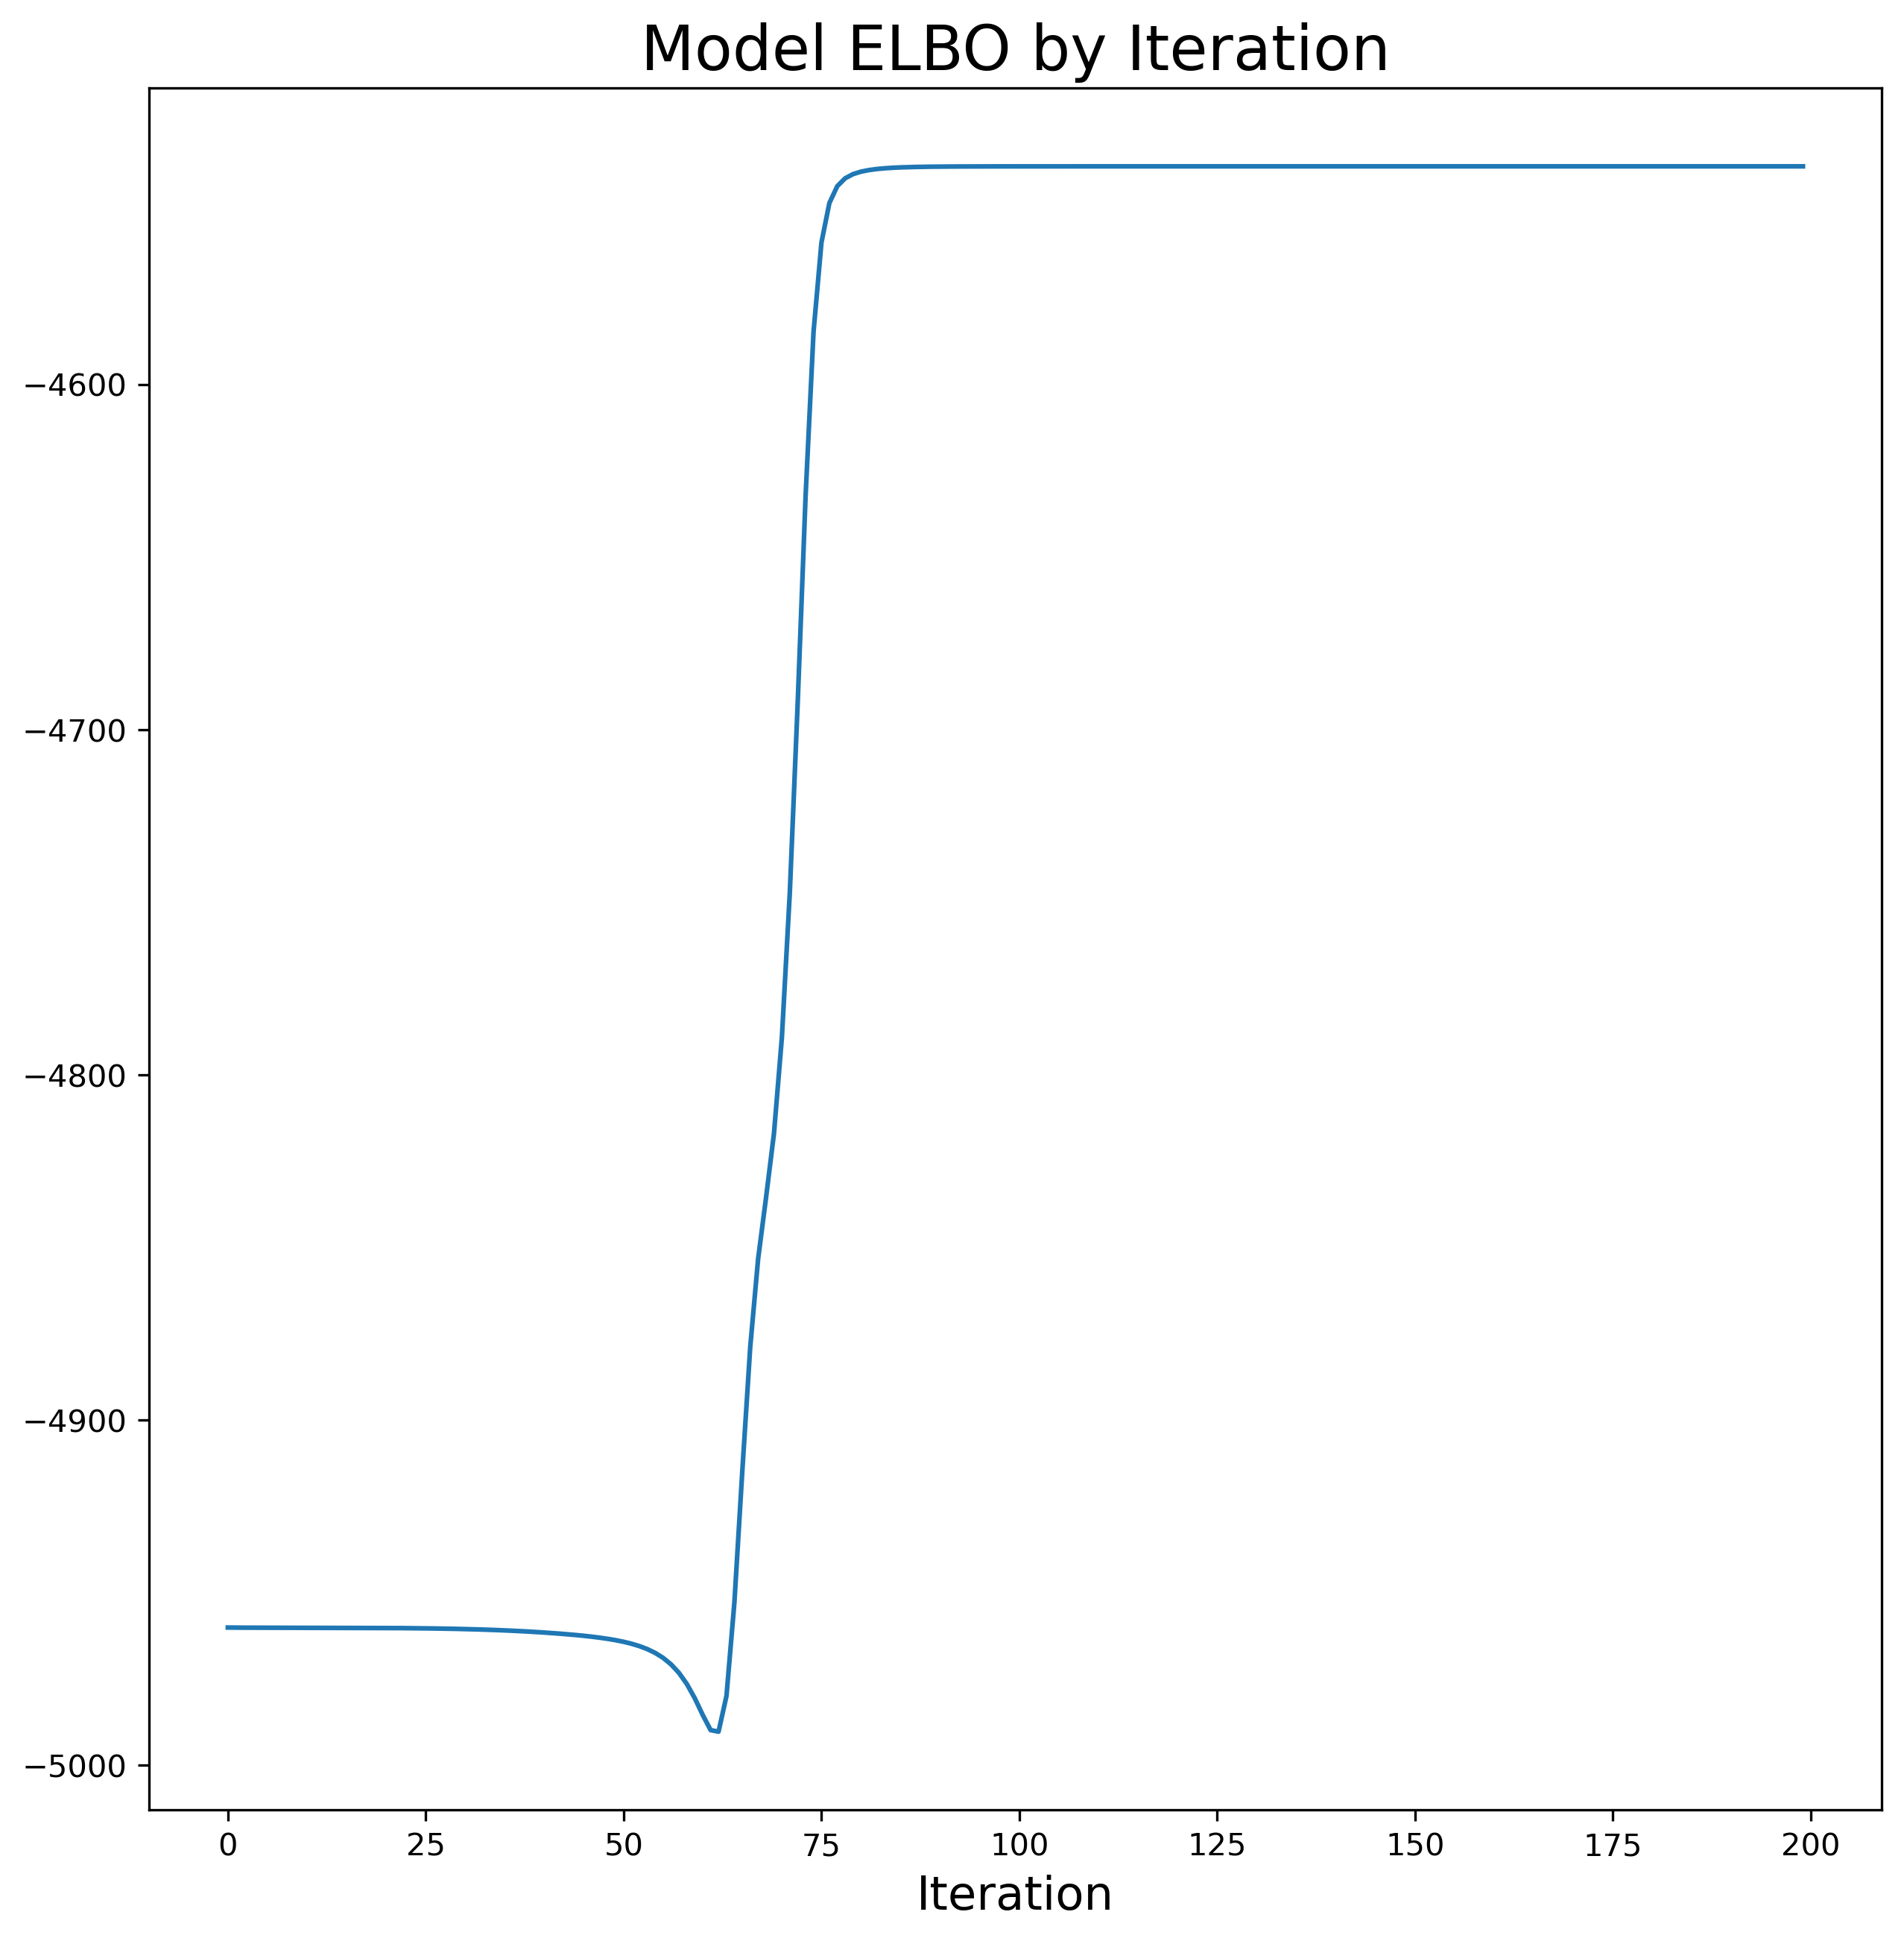

In [344]:
plt.figure(figsize=(10, 10), dpi=300)
plt.plot(elbos)
plt.title('Model ELBO by Iteration', fontsize=20)
plt.xlabel('Iteration',fontsize=15)

Text(0.5, 1.0, 'Path of Mixture Means Up To Iteration 80')

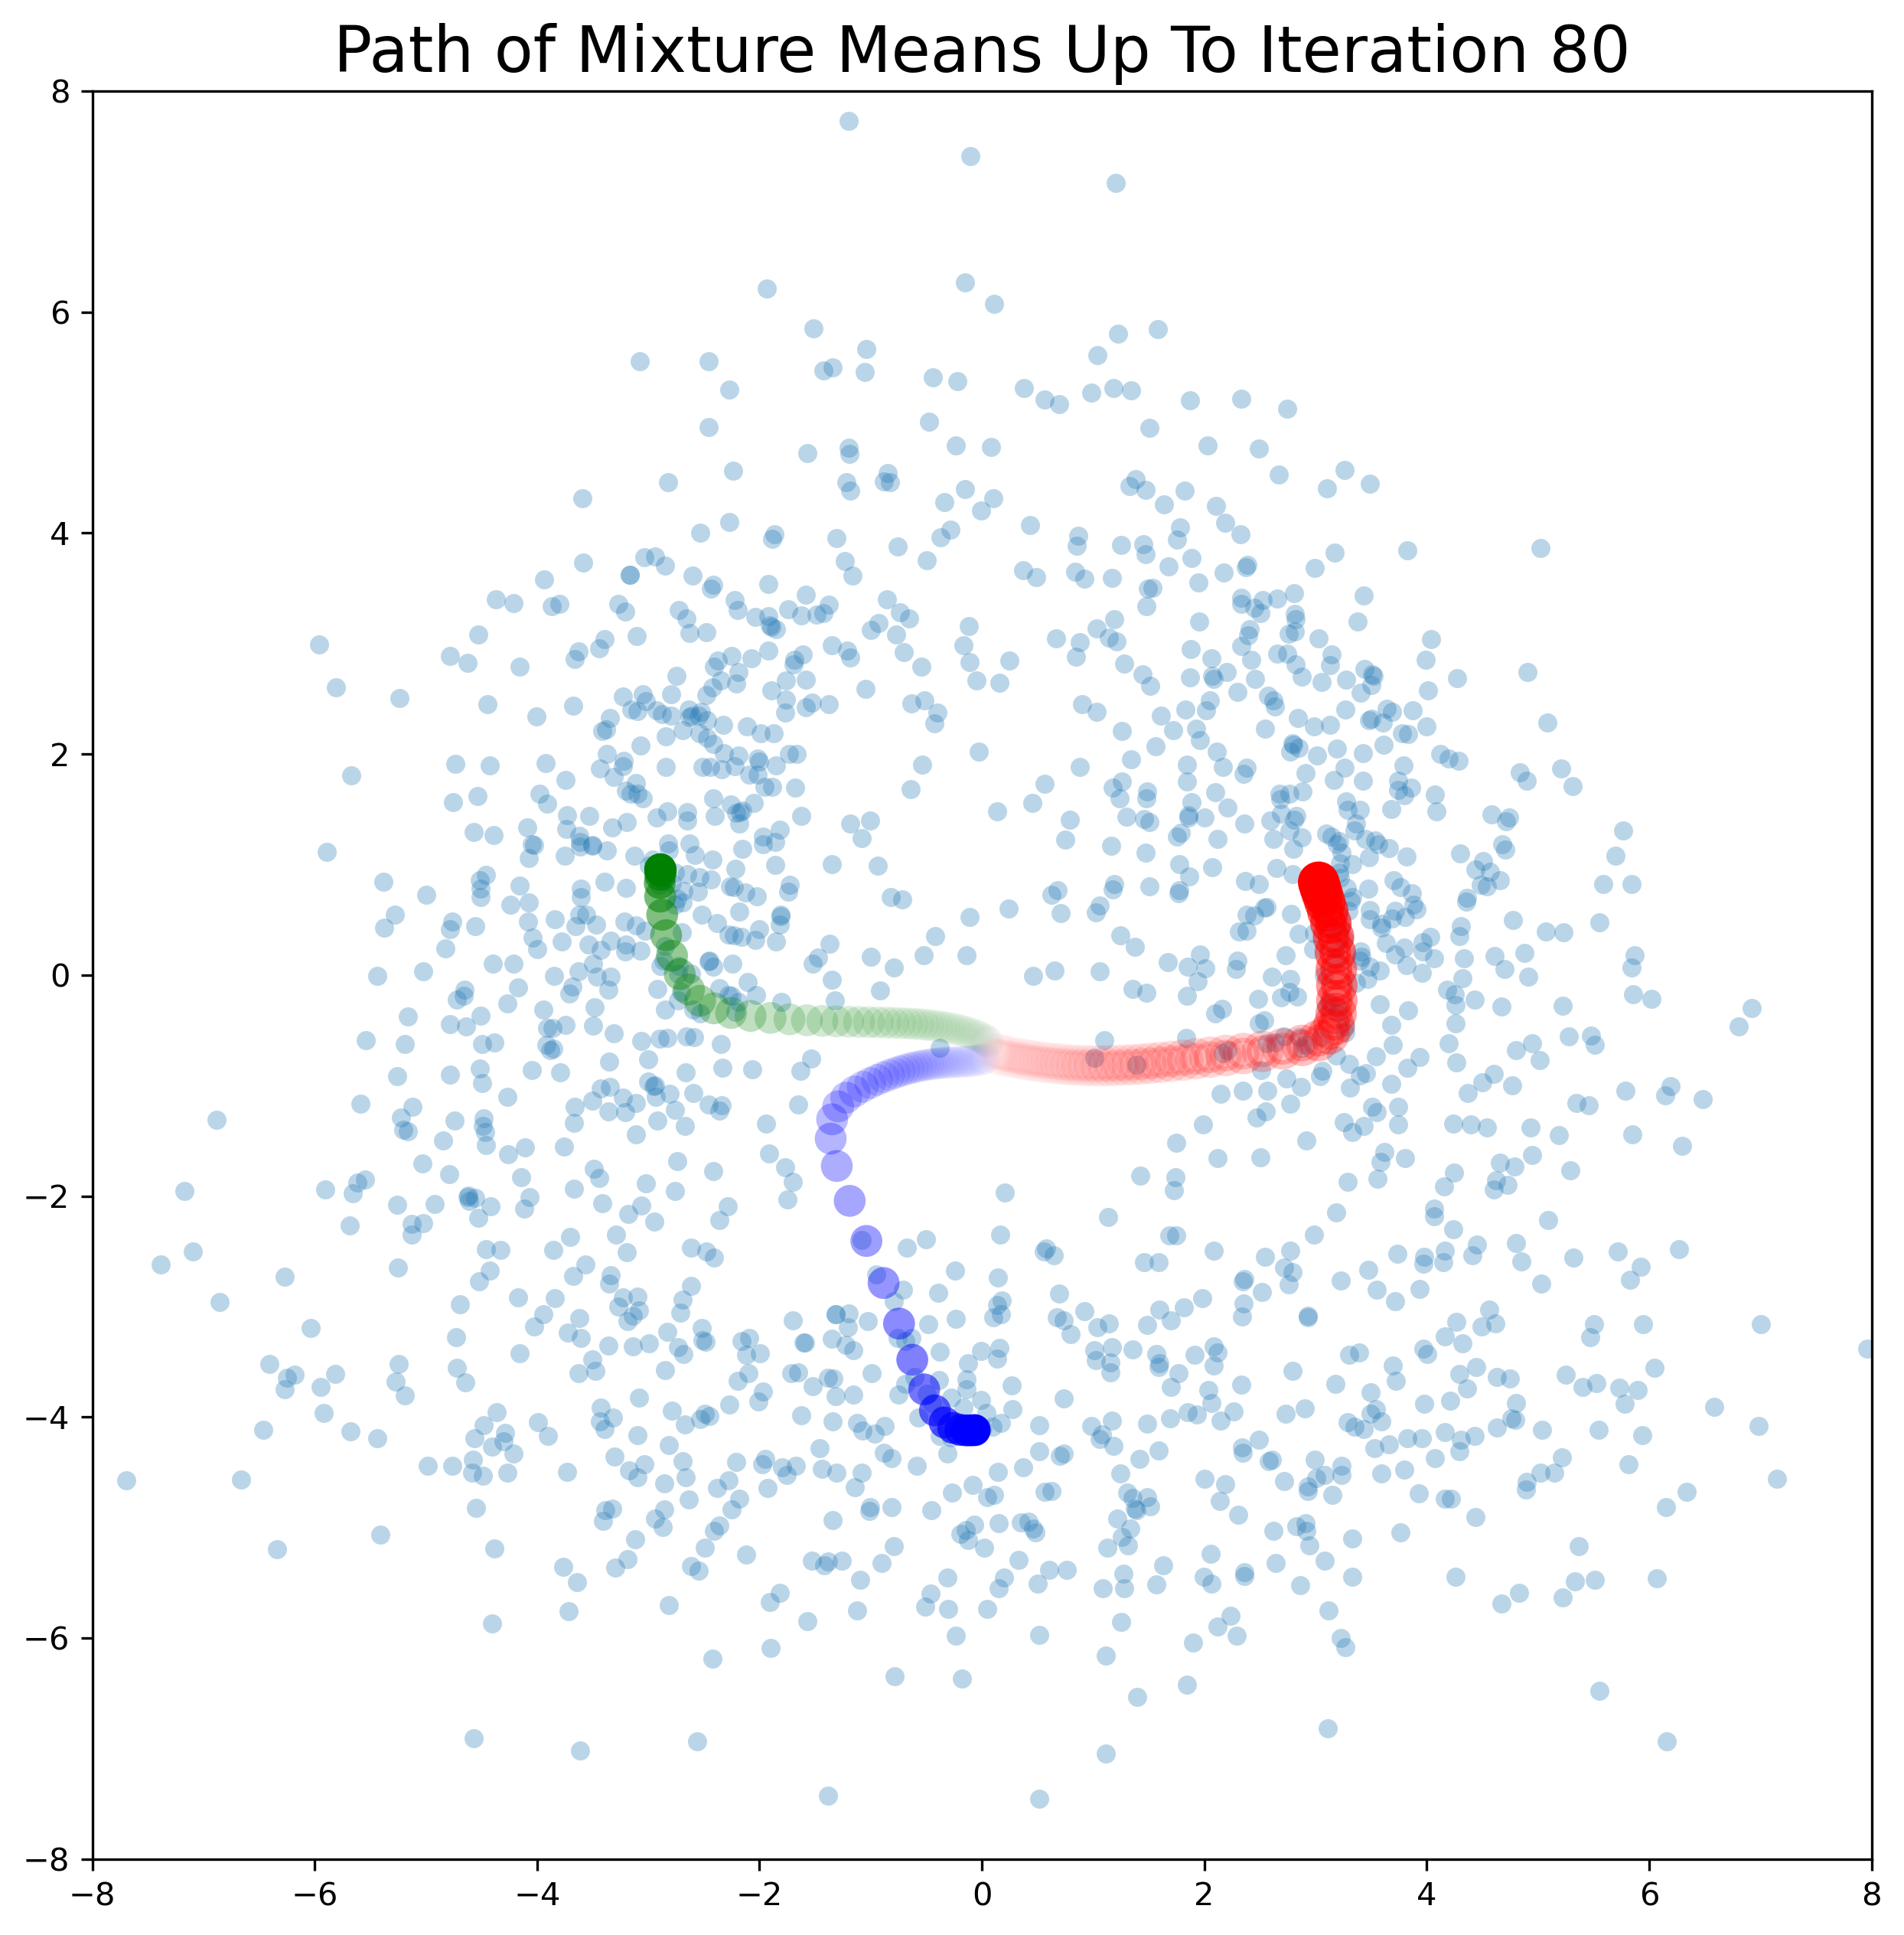

In [341]:
cl = 80

plot_data(8)
alphas = np.logspace(-1, 0, cl, base=1000)
plt.scatter(means[:cl, 0, 0], means[:cl, 0, 1], c="red", alpha=alphas, linewidth=3, s=100)
plt.scatter(means[:cl, 1, 0], means[:cl, 1, 1], c="green", alpha=alphas, linewidth=0, s=100)
plt.scatter(
    means[:cl, 2, 0], means[:cl, 2, 1], c="blue", alpha=alphas, linewidth=0, s=100
)
plt.title('Path of Mixture Means Up To Iteration 80', fontsize=20)

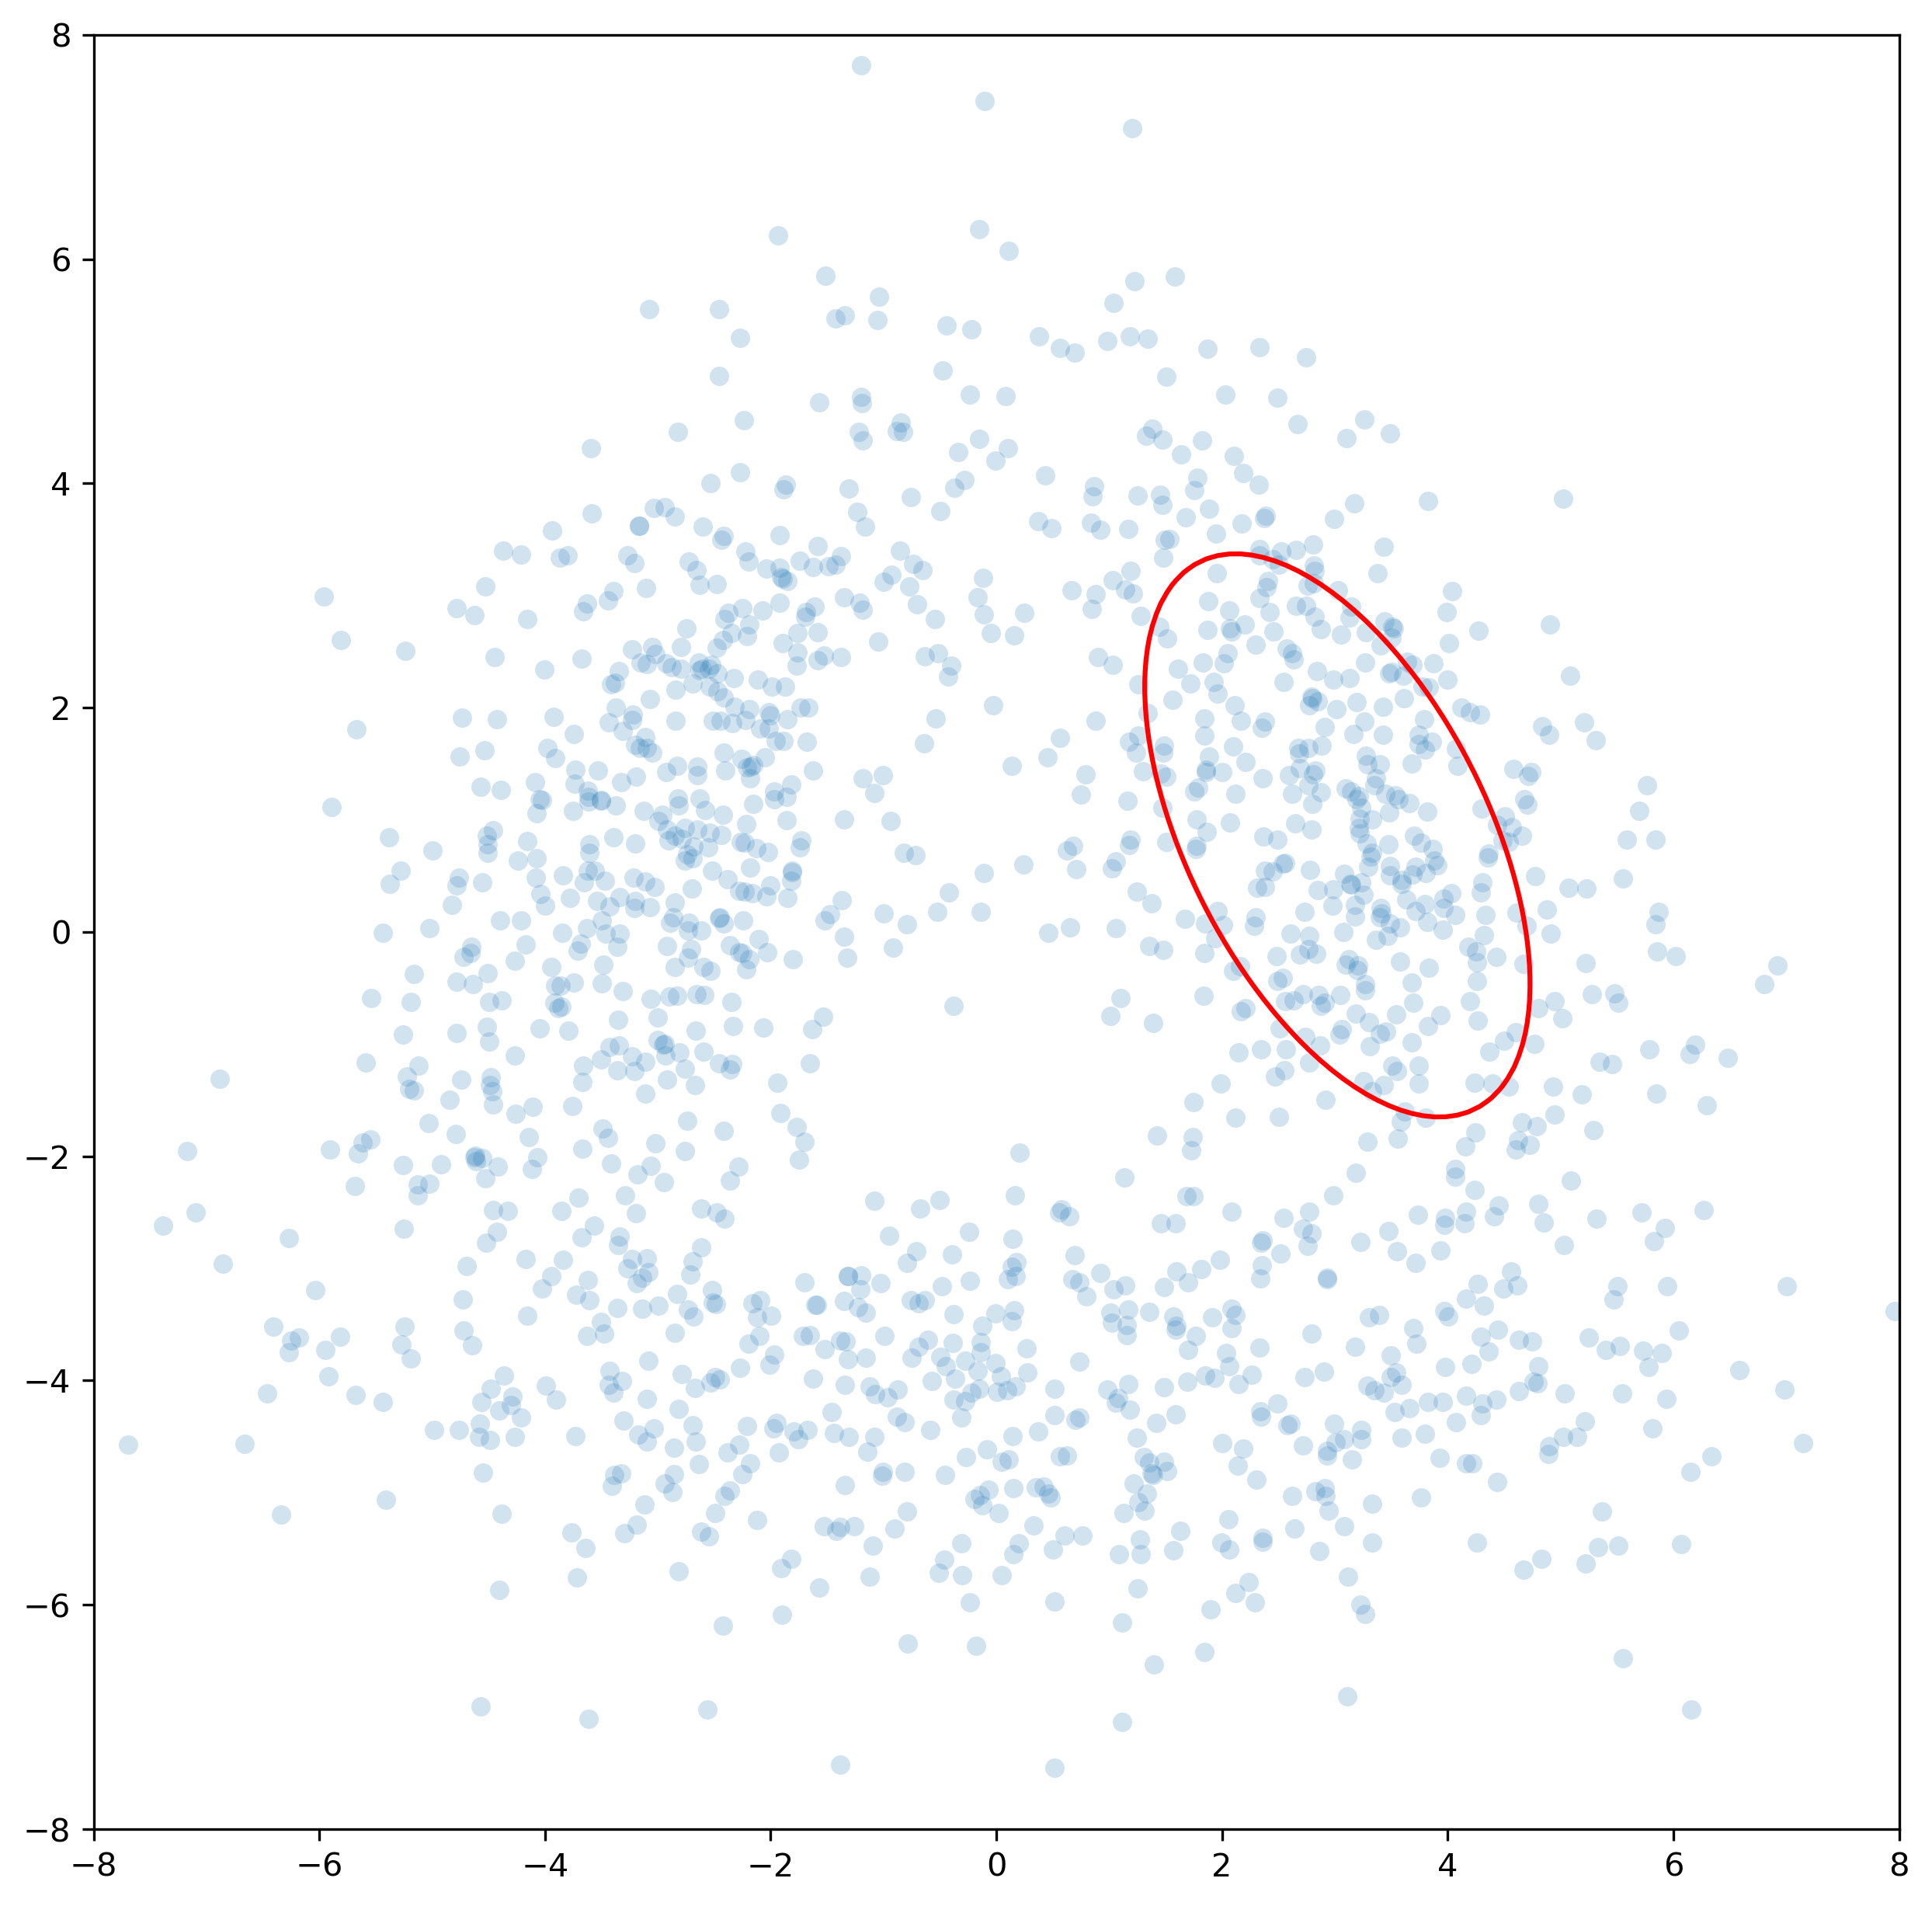

In [265]:
plot_data(8)
plot_gaussian(means[cl][0], covs[cl][0], "red", 5)

In [330]:
def plot_full(i):    
    plt.scatter(X[:, 0], X[:, 1], c=np.exp(lrs[i]), alpha=0.4, linewidth=0, s=75)
    for k in range(3):
        plot_gaussian(means[i][k], covs[i][k], colors[k], 10, 2, 3)
        plt.scatter(means[i][k, 0], means[i][k, 1], c=colors[k], s=200, marker='X', edgecolors='white')

Text(0.5, 1.0, 'Model at Iteration 80')

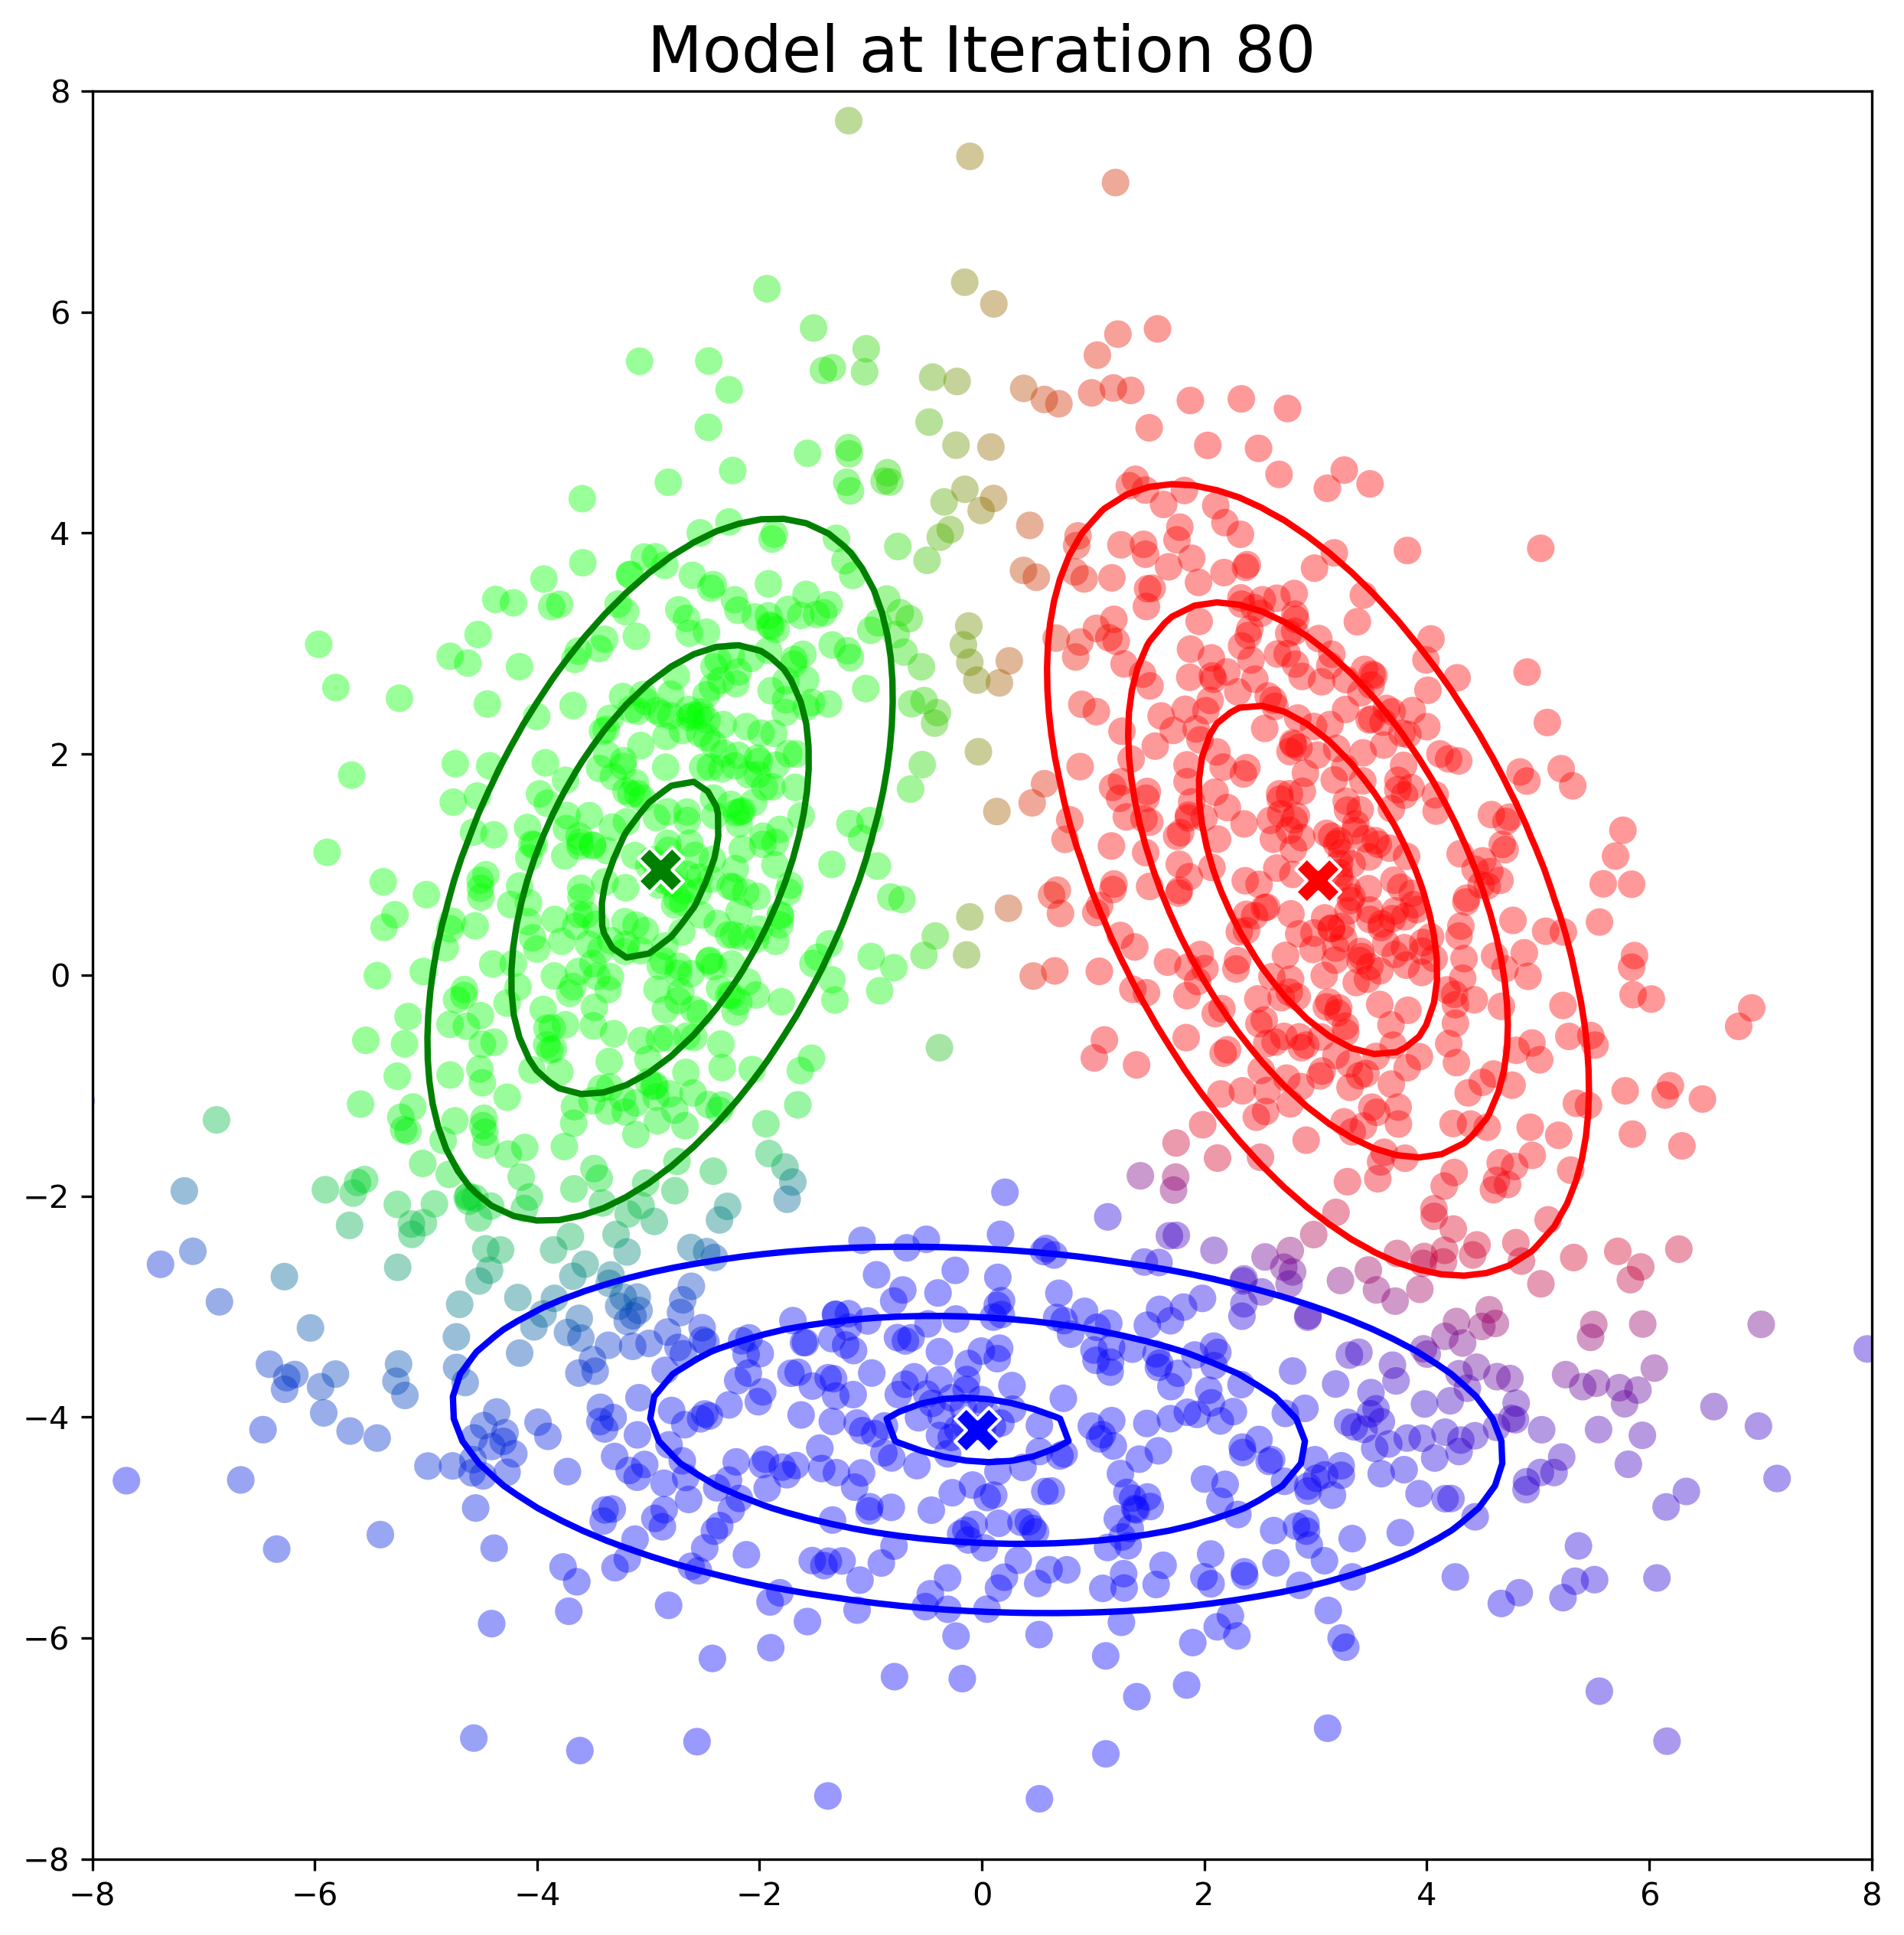

In [333]:
plt.figure(figsize=(10,10), dpi=300)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plot_full(80)
plt.title('Model at Iteration 80', fontsize=20)

Text(0.5, 1.0, 'Model at Iteration 70')

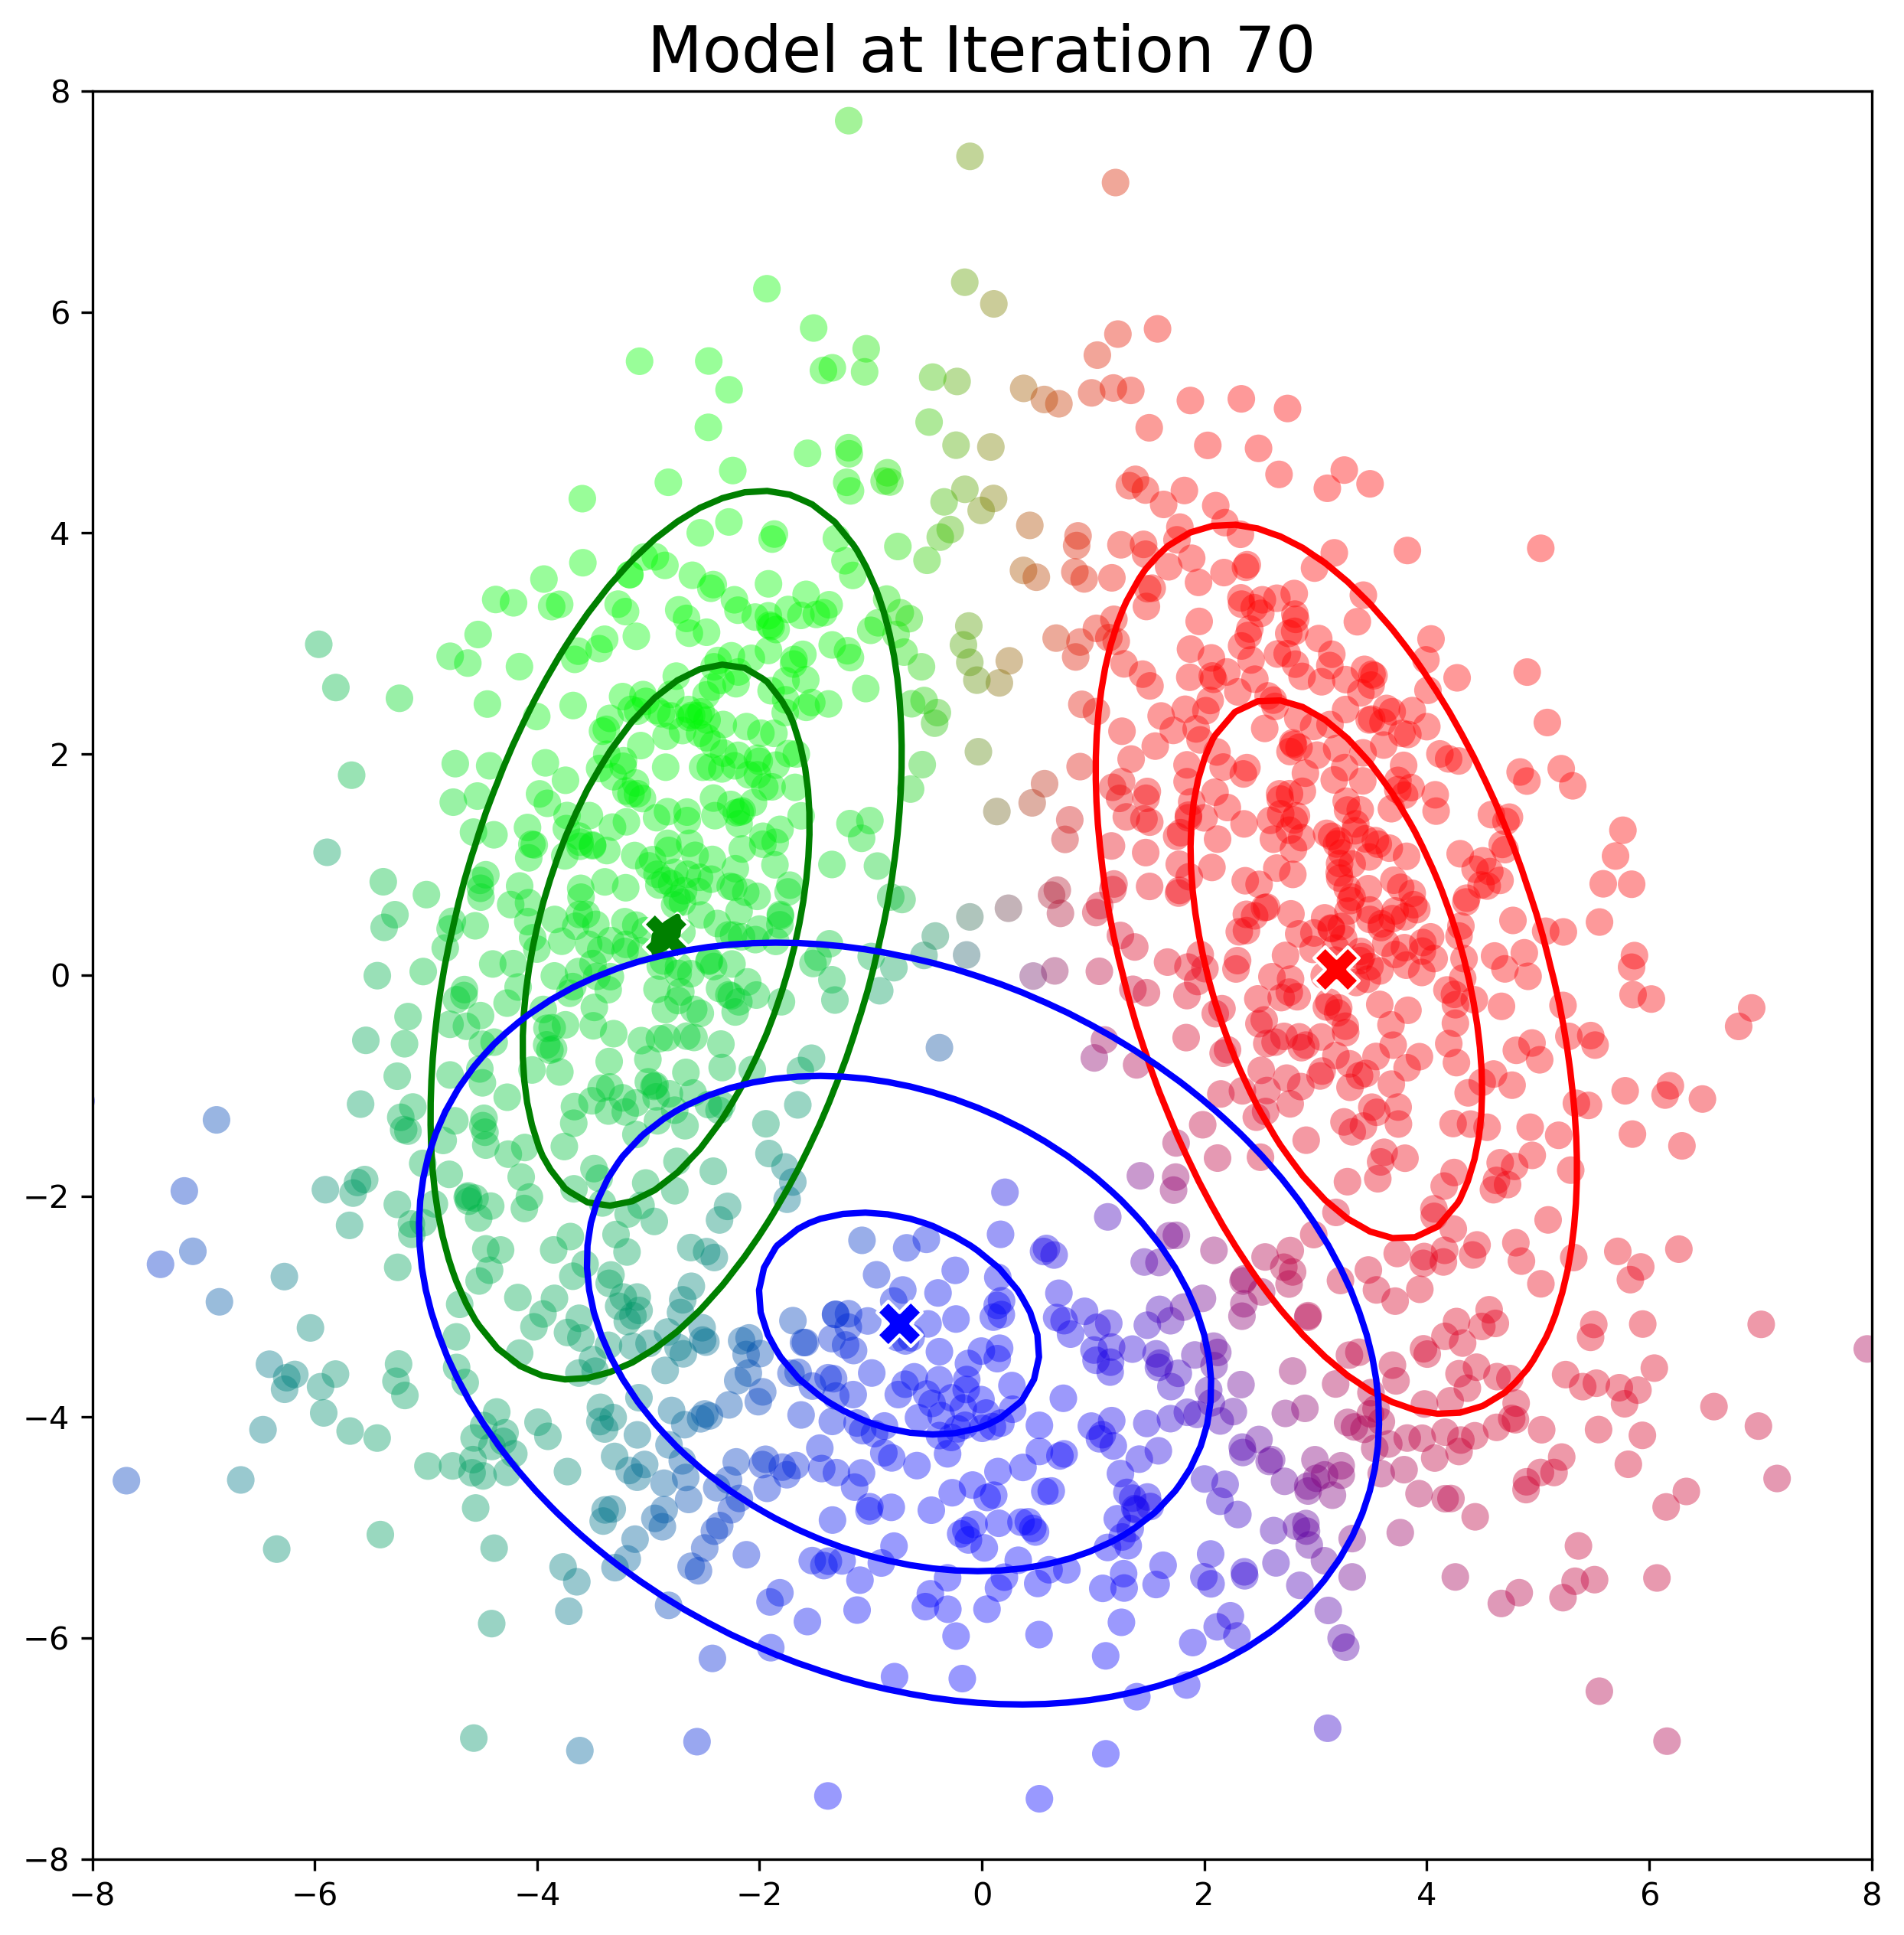

In [334]:
plt.figure(figsize=(10,10), dpi=300)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plot_full(70)
plt.title('Model at Iteration 70', fontsize=20)

Text(0.5, 1.0, 'Model at Iteration 60')

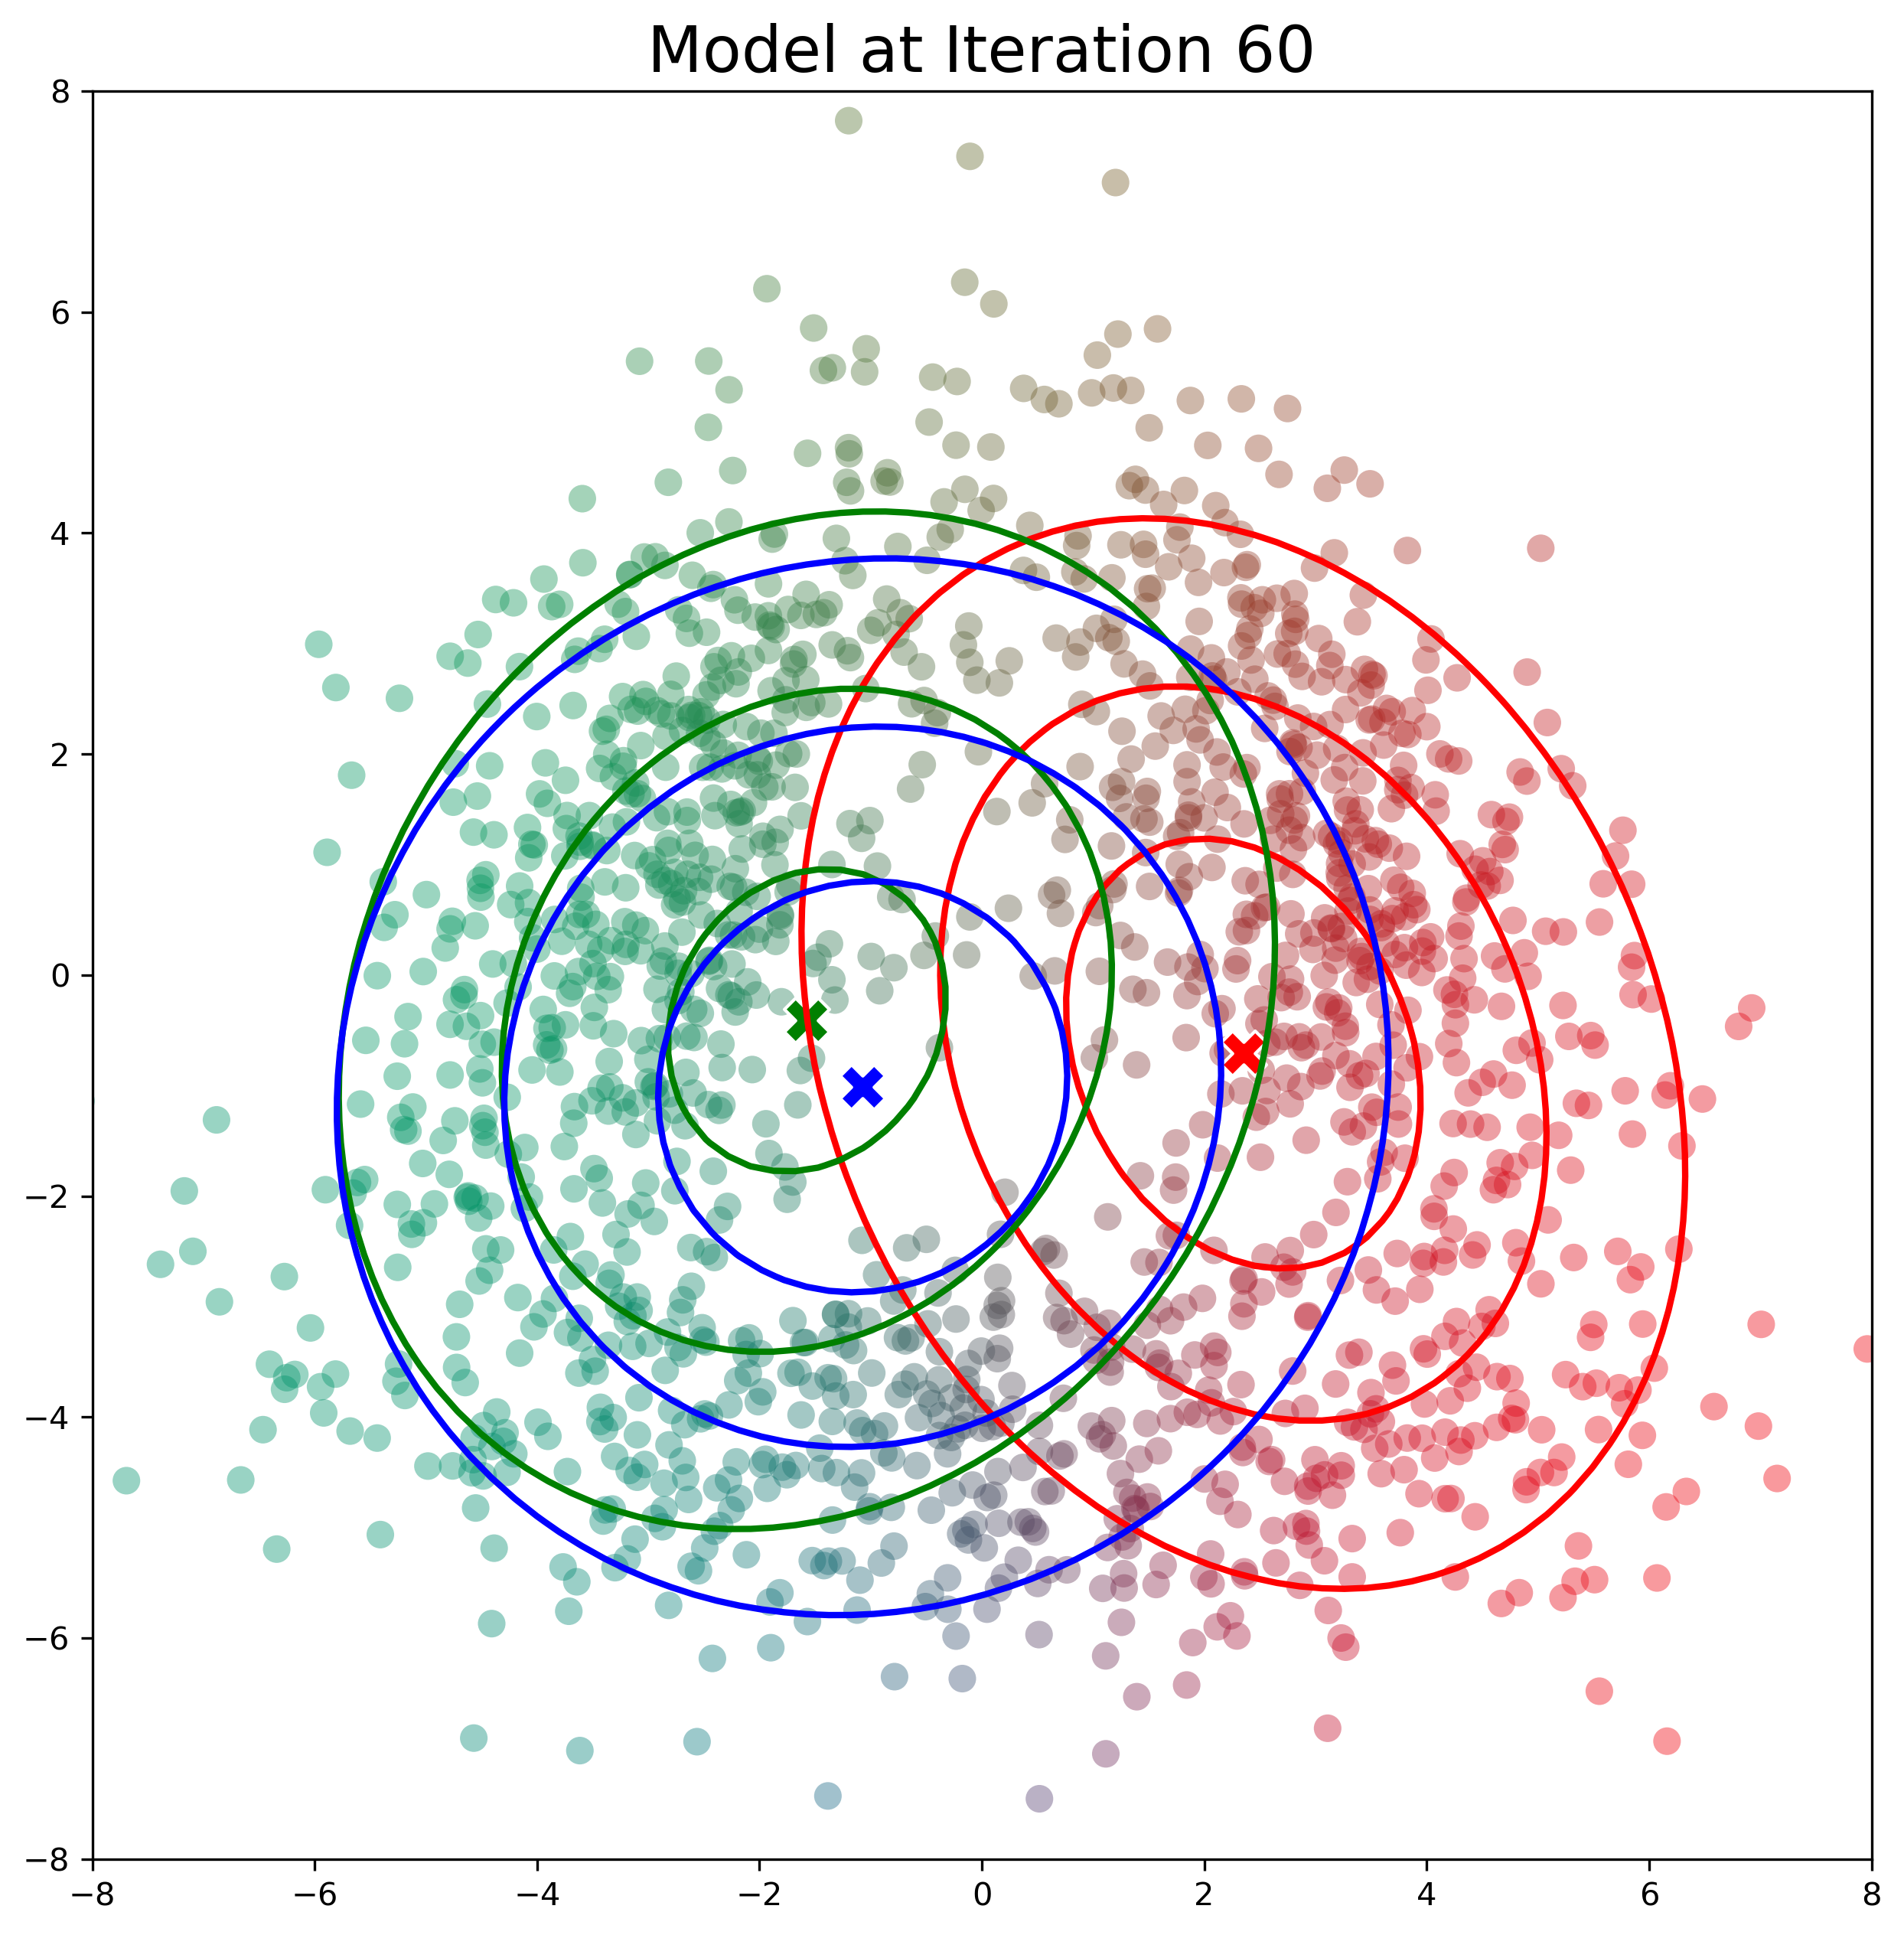

In [335]:
plt.figure(figsize=(10,10), dpi=300)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plot_full(60)
plt.title('Model at Iteration 60', fontsize=20)

Text(0.5, 1.0, 'Model at Iteration 0')

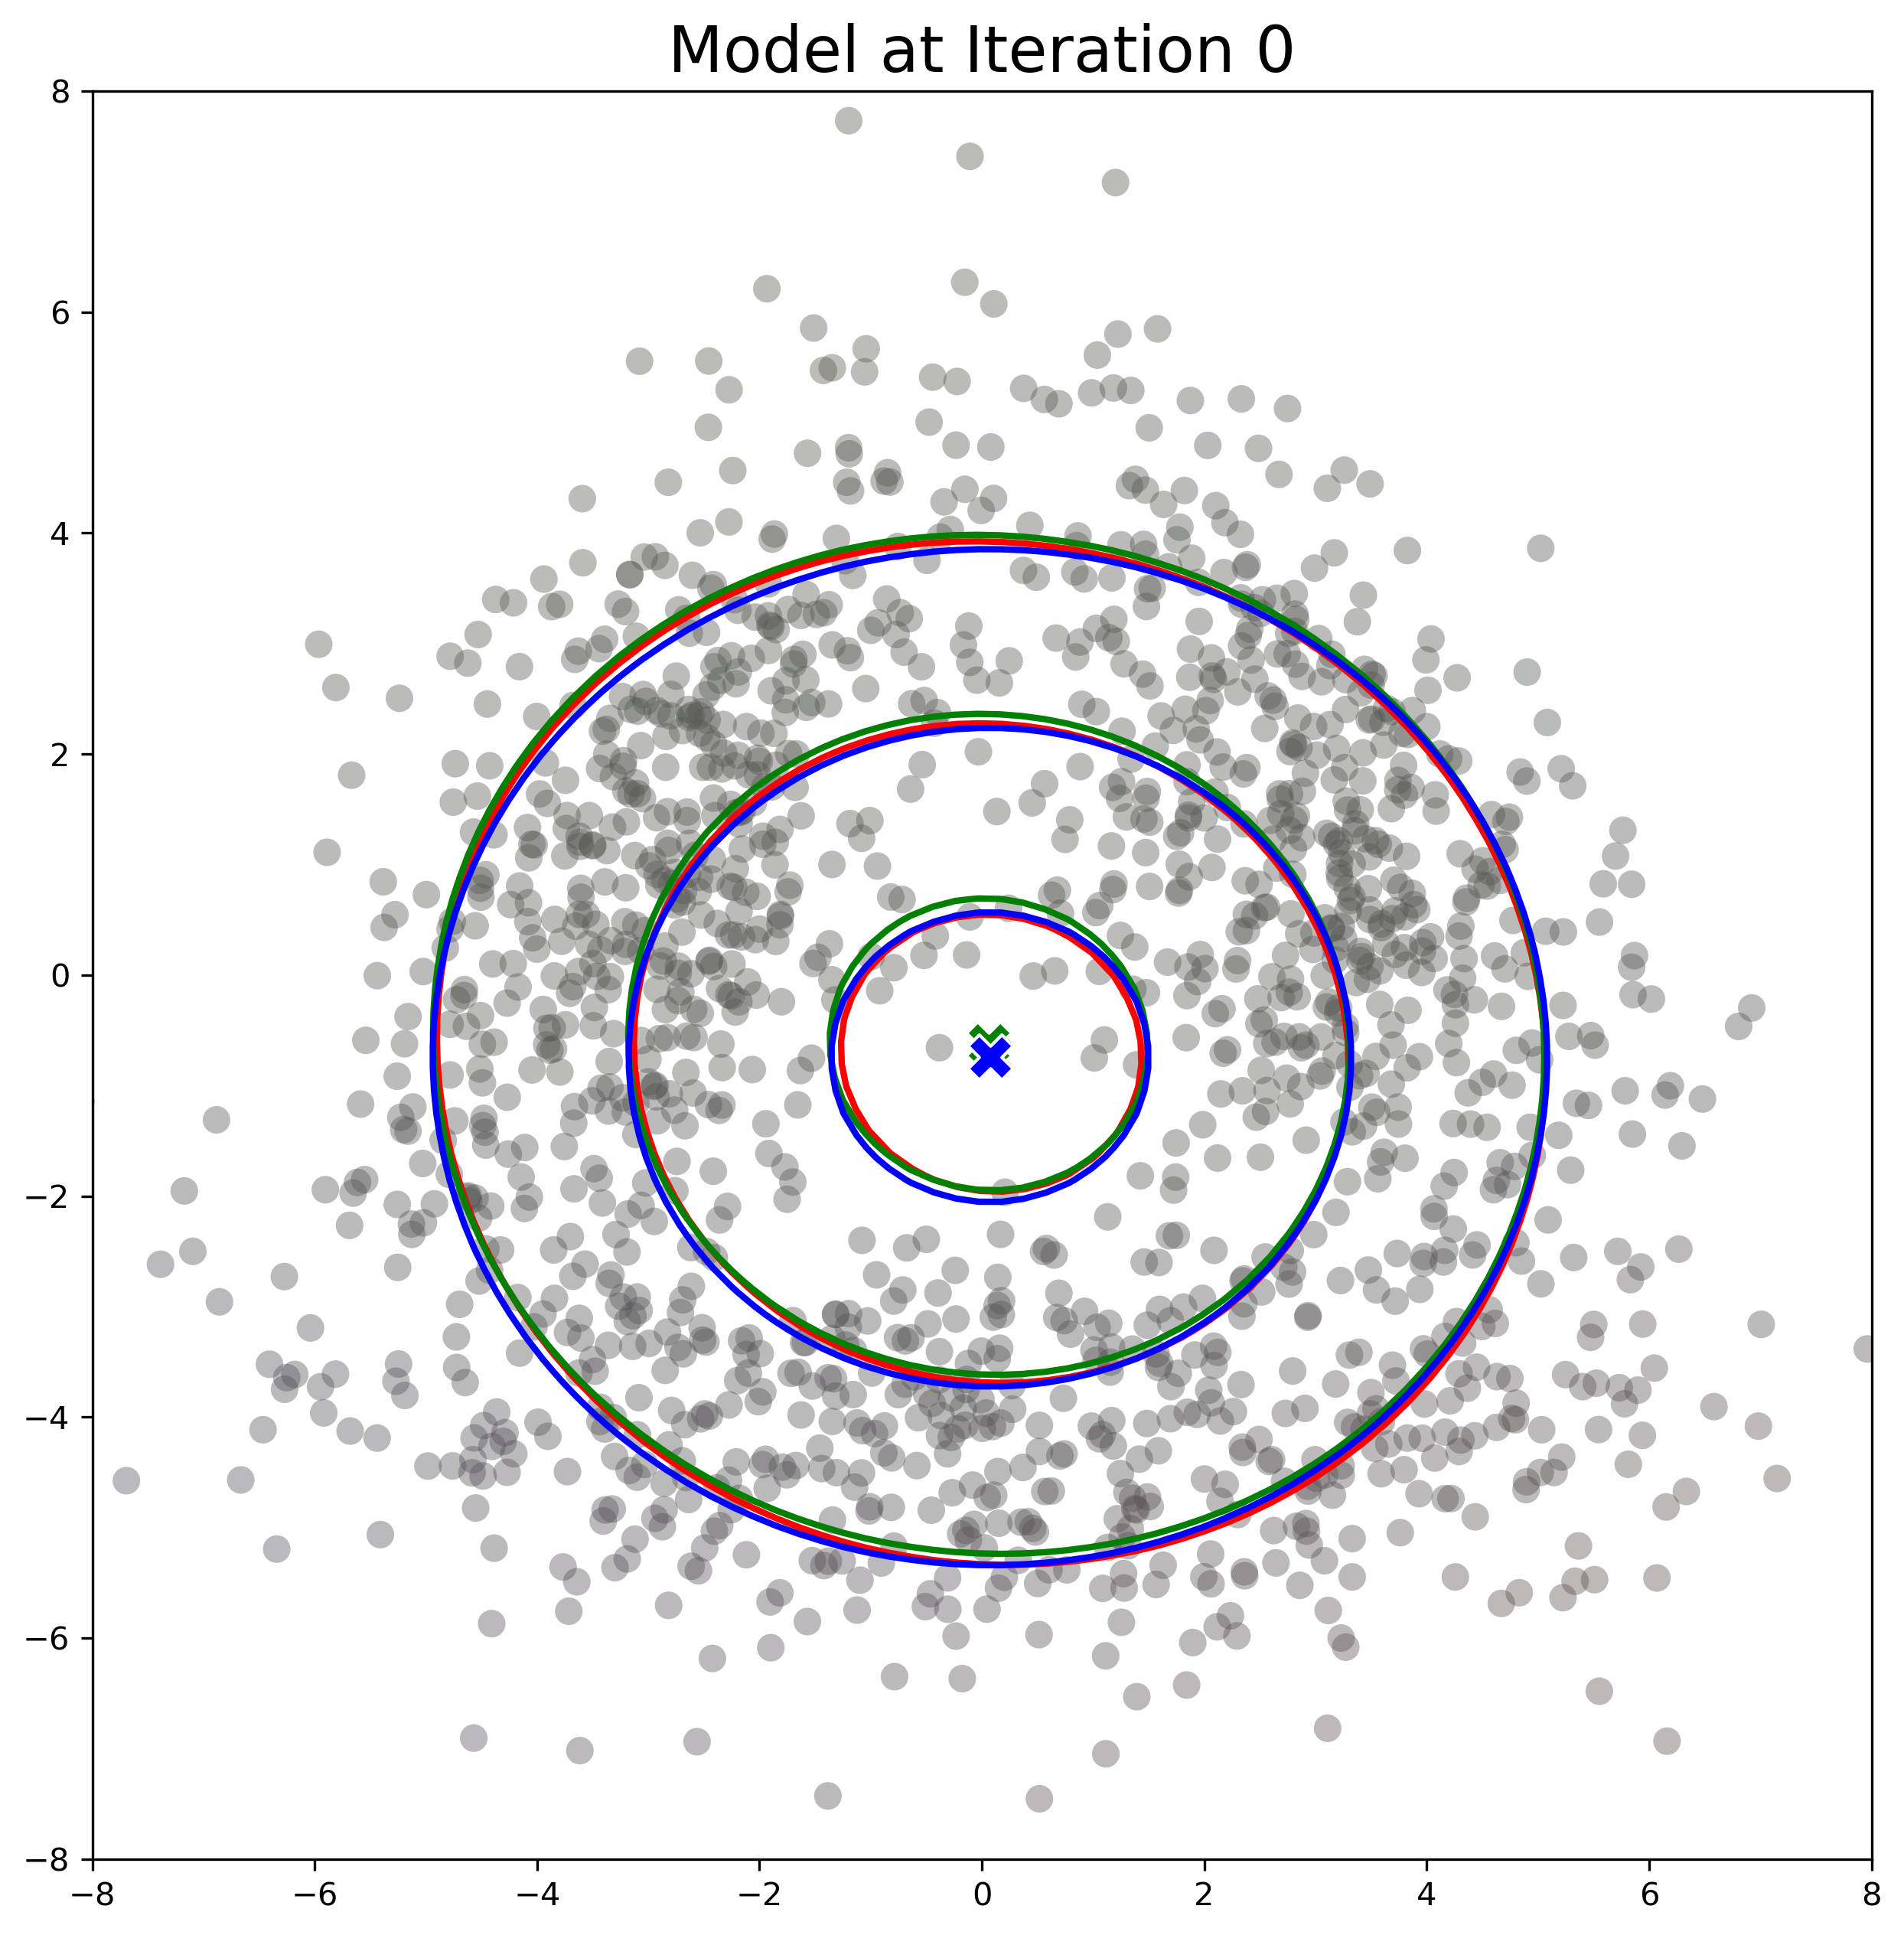

In [336]:
plt.figure(figsize=(10,10), dpi=300)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plot_full(0)
plt.title('Model at Iteration 0', fontsize=20)

Text(0.5, 1.0, 'Synthetic Data')

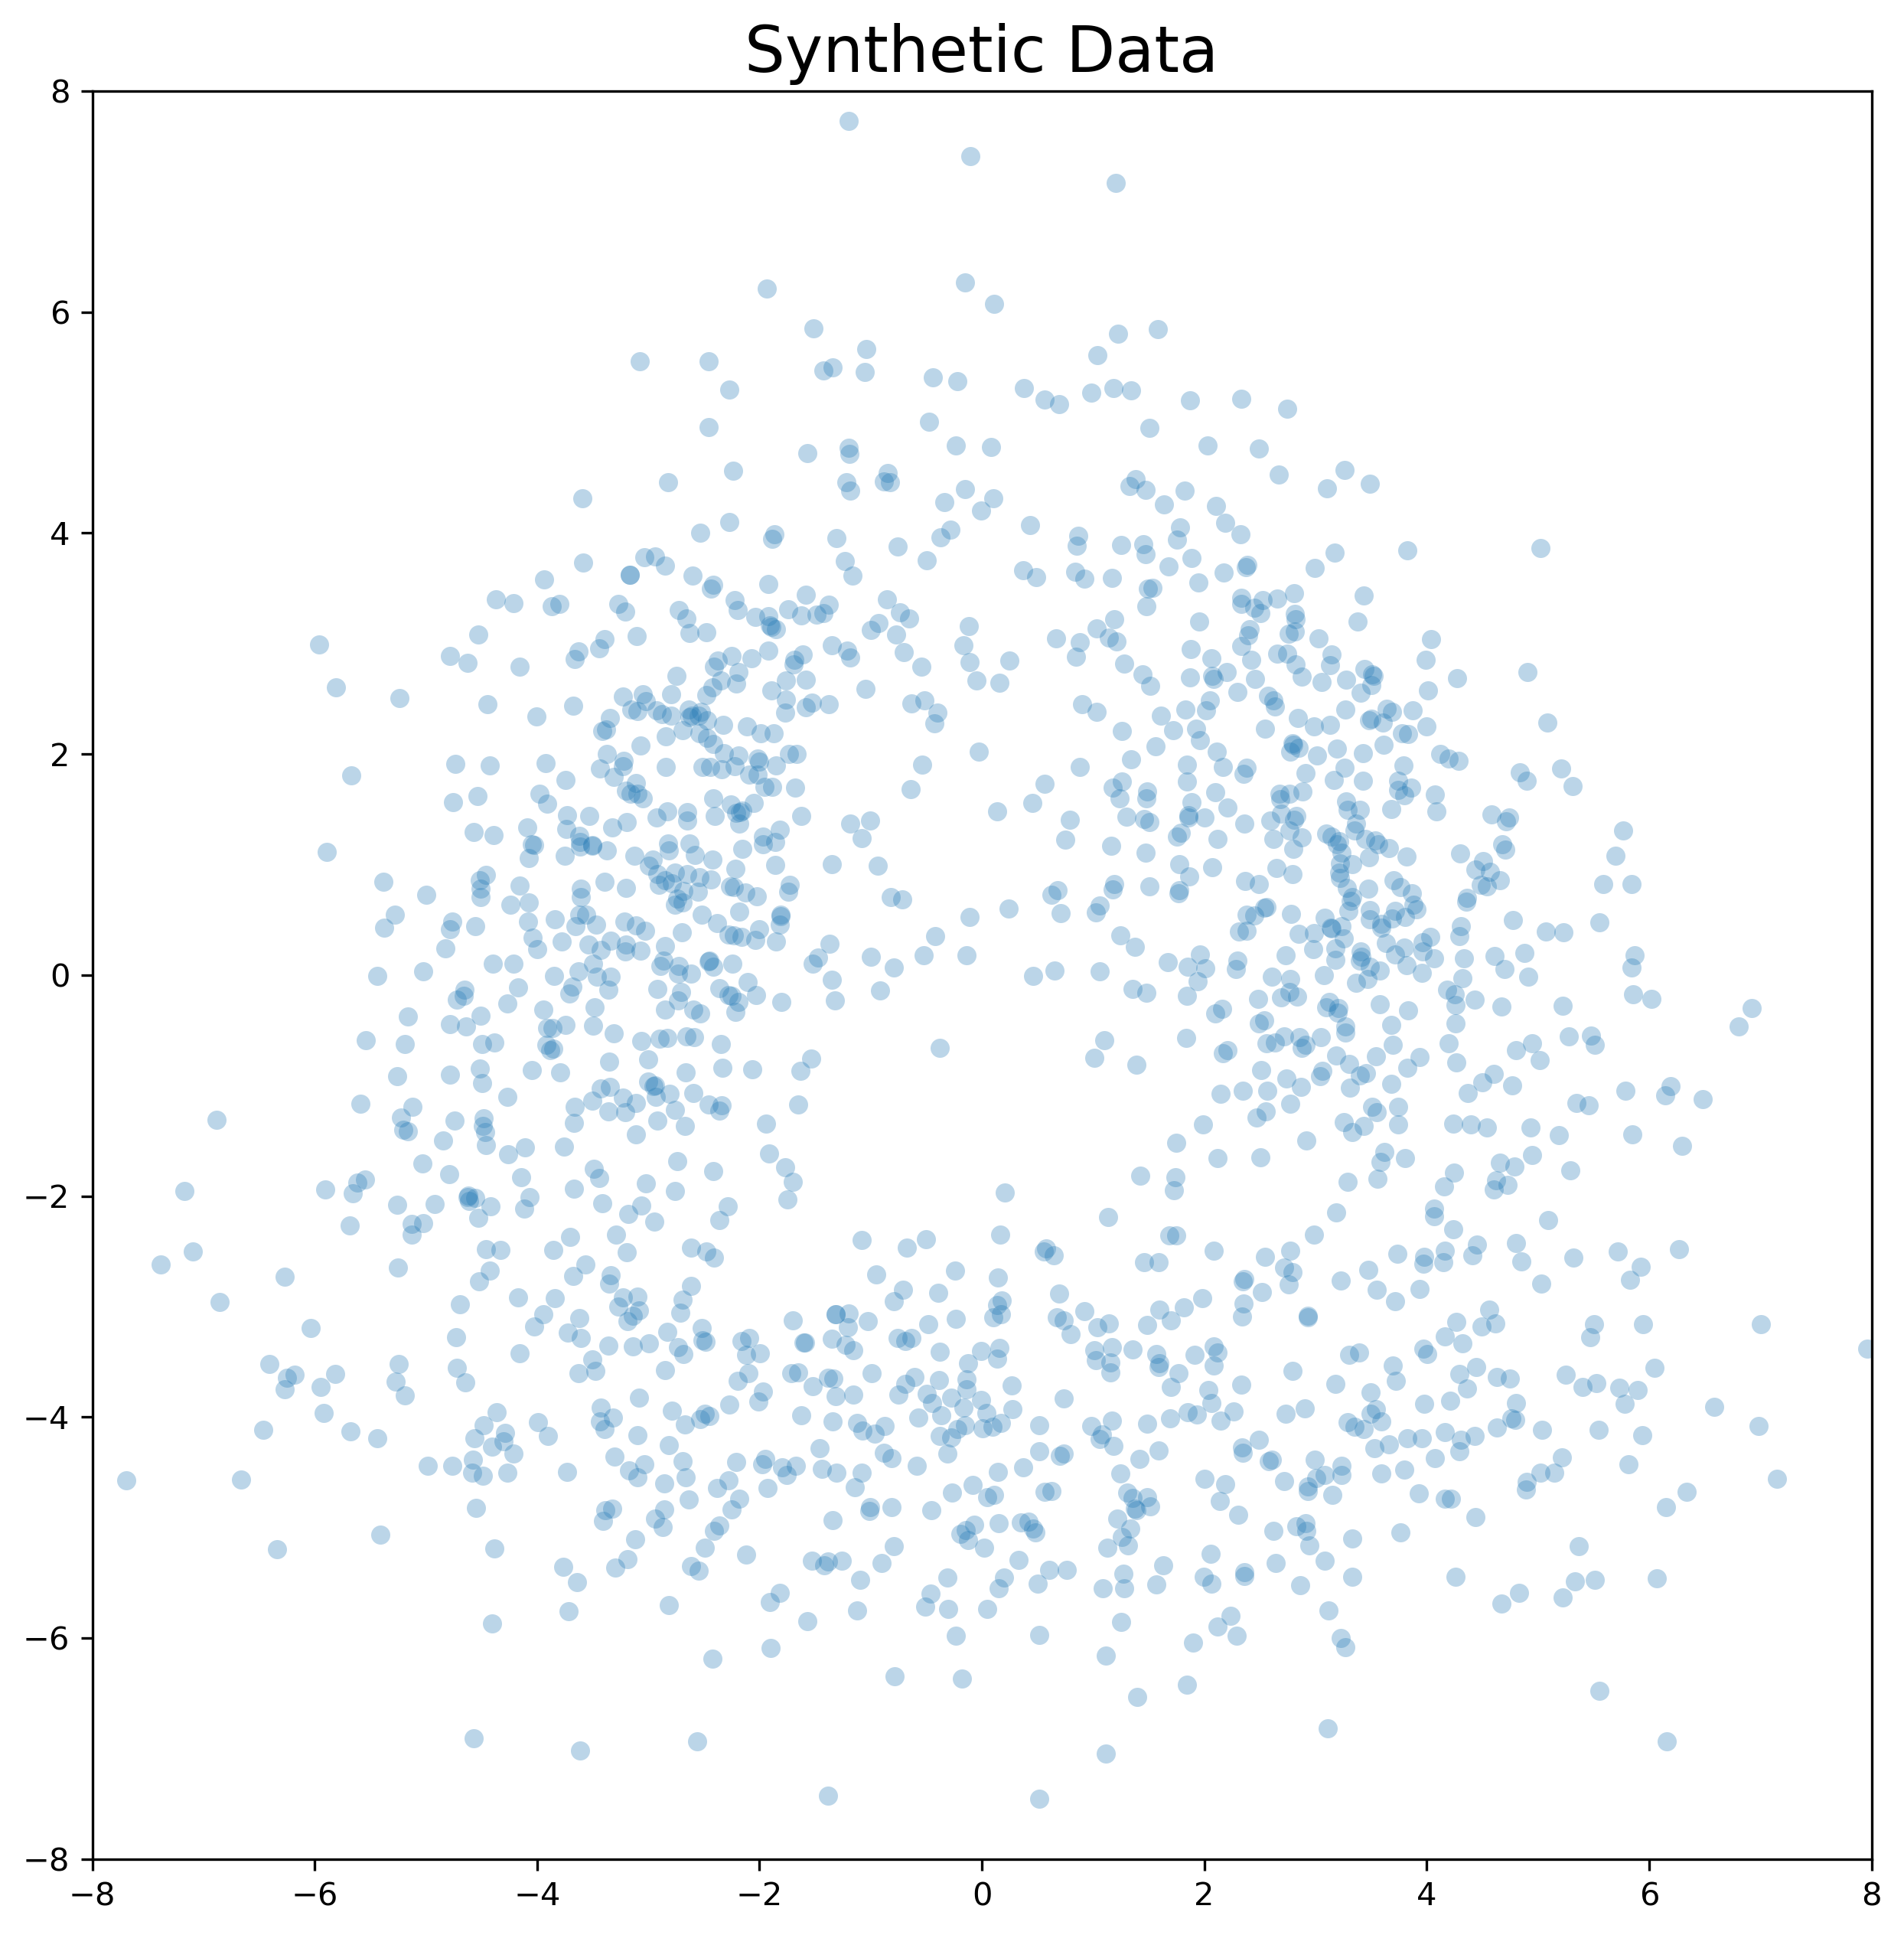

In [329]:
plot_data(8)
plt.title('Synthetic Data', fontsize=20)